In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline

In [2]:
poke = pd.read_csv('pokemon_alopez247.csv', index_col='Number')

mon = pd.read_csv('all_poke_encoded_species.csv', index_col='#')

evol = pd.read_csv('pokemon_evolchain2.csv', index_col='id')

## Organization begins halfway through the notebook.
# First, I must clean

In [36]:
pd.set_option('display.max_colwidth',999)

In [37]:
poke.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
mon.head()

,Unnamed: 0,species
#,,
1,0,Seed
2,1,Seed
3,2,Seed
4,3,Lizard
5,4,Flame


In [5]:
evol.head()

,evolves_from_species_id,evolution_chain_id
id,,
1,NaN,1
2,1.0,1
3,2.0,1
4,NaN,2
5,4.0,2


In [8]:
pokemon = pd.concat([poke, mon], axis=1)

In [9]:
pokemon = pd.concat([pokemon, evol], axis=1)

In [36]:
#Drop my columns that I brought in with the concatenation
pokemon.drop('Unnamed: 0', axis=1, inplace=True)
pokemon.drop('#', axis=1, inplace=True)

ValueError: labels ['#'] not contained in axis

In [12]:
# Rather than having Null values within Categorical Columns, I'll make 'None' a category
pokemon['Type_2'] = pokemon['Type_2'].fillna('None')
pokemon['Egg_Group_2'] = pokemon['Egg_Group_2'].fillna('None')

In [13]:
# Create a new columm for Percentage Female
pokemon['Pr_Female'] = (pokemon['Pr_Male'] - 1).abs()

C:\Users\Scrubbo\Anaconda\lib\site-packages\pandas\core\generic.py:5135: RuntimeWarning: invalid value encountered in absolute
  return np.abs(self)


In [44]:
pokemon.columns

Index([u'Name', u'Type_1', u'Type_2', u'Total', u'HP', u'Attack', u'Defense',
       u'Sp_Atk', u'Sp_Def', u'Speed', u'Generation', u'isLegendary', u'Color',
       u'hasGender', u'Pr_Male', u'Egg_Group_1', u'Egg_Group_2',
       u'hasMegaEvolution', u'Height_m', u'Weight_kg', u'Catch_Rate',
       u'Body_Style', u'species', u'Pr_Female'],
      dtype='object')

In [14]:
# Fill my Null values with 0's
pokemon['Pr_Male'] = pokemon['Pr_Male'].fillna(0)
pokemon['Pr_Female'] = pokemon['Pr_Female'].fillna(0)

In [15]:
# Broadcasting a BMI equation for a new column
pokemon['BMI'] = pokemon['Weight_kg'] / pokemon['Height_m']**2

In [16]:
# Rather than just having the Generation, I'd like to see the Region as well
region = {
    1: 'Kanto',
    2: 'Johto',
    3: 'Hoenn',
    4: 'Sinnoh',
    5: 'Unova',
    6: 'Kalos'
}

pokemon['region'] = pokemon['Generation'].map(region)

In [11]:
# Incase I want to look at individual Generations of Pokemon without filtering each time

gen1 = pokemon.loc[pokemon['Generation']==1]

gen2 = pokemon.loc[pokemon['Generation']==2]

gen3 = pokemon.loc[pokemon['Generation']==3]

gen4 = pokemon.loc[pokemon['Generation']==4]

gen5 = pokemon.loc[pokemon['Generation']==5]

gen6 = pokemon.loc[pokemon['Generation']==6]

In [49]:
pokemon.columns

Index([u'Name', u'Type_1', u'Type_2', u'Total', u'HP', u'Attack', u'Defense',
       u'Sp_Atk', u'Sp_Def', u'Speed', u'Generation', u'isLegendary', u'Color',
       u'hasGender', u'Pr_Male', u'Egg_Group_1', u'Egg_Group_2',
       u'hasMegaEvolution', u'Height_m', u'Weight_kg', u'Catch_Rate',
       u'Body_Style', u'species', u'Pr_Female', u'BMI', u'region'],
      dtype='object')

In [12]:
# Export to CSV for further analysis
pokemon.to_csv('pokemon+species.csv')

In [4]:
pokemon = pd.read_csv('pokemon+species.csv')

In [16]:
pokemon['species'].unique()

array(['Seed', 'Lizard', 'Flame', 'Tiny Turtle', 'Turtle', 'Shellfish',
       'Worm', 'Cocoon', 'Butterfly', 'Hairy Bug', 'Poison Bee',
       'Tiny Bird', 'Bird', 'Mouse', 'Beak', 'Snake', 'Cobra',
       'Poison Pin', 'Drill', 'Fairy', 'Fox', 'Balloon', 'Bat', 'Weed',
       'Flower', 'Mushroom', 'Insect', 'Poison Moth', 'Mole',
       'Scratch Cat', 'Classy Cat', 'Duck', 'Pig Monkey', 'Puppy',
       'Legendary', 'Tadpole', 'Psi', 'Superpower', 'Flycatcher',
       'Jellyfish', 'Rock', 'Megaton', 'Fire Horse', 'Dopey',
       'Hermit Crab', 'Magnet', 'Wild Duck', 'Twin Bird', 'Triple Bird',
       'Sea Lion', 'Sludge', 'Bivalve', 'Gas', 'Shadow', 'Rock Snake',
       'Hypnosis', 'River Crab', 'Pincer', 'Ball', 'Egg', 'Coconut',
       'Lonely', 'Bone Keeper', 'Kicking', 'Punching', 'Licking',
       'Poison Gas', 'Spikes', 'Vine', 'Parent', 'Dragon', 'Goldfish',
       'Star Shape', 'Mysterious', 'Barrier', 'Mantis', 'Human Shape',
       'Electric', 'Spitfire', 'Stag Beetle', 'Wil

In [168]:
pokemon['Body_Style'].unique()

array(['quadruped', 'bipedal_tailed', 'insectoid', 'serpentine_body',
       'four_wings', 'two_wings', 'bipedal_tailless', 'head_legs',
       'head_base', 'multiple_bodies', 'several_limbs', 'head_arms',
       'with_fins', 'head_only'], dtype=object)

In [164]:
pokemon['Body_Style'].value_counts()

bipedal_tailed      158
quadruped           135
bipedal_tailless    109
two_wings            63
head_arms            39
head_only            34
with_fins            31
insectoid            30
head_base            30
serpentine_body      29
four_wings           18
head_legs            17
multiple_bodies      15
several_limbs        13
Name: Body_Style, dtype: int64

In [32]:
pokemon.loc[pokemon['Body_Style']=='several_limbs']

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,species,Pr_Female,BMI,region
71,72,Tentacool,Water,Poison,335,40,40,35,50,100,...,None,False,0.89,45.5,190,several_limbs,Jellyfish,0.500,57.442242,Kanto
72,73,Tentacruel,Water,Poison,515,80,70,65,80,120,...,None,False,1.60,55.0,60,several_limbs,Jellyfish,0.500,21.484375,Kanto
137,138,Omanyte,Rock,Water,355,35,40,100,90,55,...,Water_3,False,0.41,7.5,45,several_limbs,Spiral,0.125,44.616300,Kanto
138,139,Omastar,Rock,Water,495,70,60,125,115,70,...,Water_3,False,0.99,35.0,45,several_limbs,Spiral,0.125,35.710642,Kanto
223,224,Octillery,Water,None,480,75,105,75,105,75,...,Water_2,False,0.89,28.5,75,several_limbs,Jet,0.500,35.980306,Johto
454,455,Carnivine,Grass,None,454,74,100,72,90,72,...,None,False,1.40,27.0,200,several_limbs,Bug Catcher,0.500,13.775510,Sinnoh
524,525,Boldore,Rock,None,390,70,105,105,50,40,...,None,False,0.89,102.0,120,several_limbs,Ore,0.500,128.771620,Unova
525,526,Gigalith,Rock,None,515,85,135,130,60,80,...,None,False,1.70,260.0,45,several_limbs,Compressed,0.500,89.965398,Unova
591,592,Frillish,Water,Ghost,335,55,40,50,65,85,...,None,False,1.19,33.0,190,several_limbs,Floating,0.500,23.303439,Unova
592,593,Jellicent,Water,Ghost,480,100,60,70,85,105,...,None,False,2.21,135.0,60,several_limbs,Floating,0.500,27.640712,Unova


### Oh Wow Such Wonderful Readability
##### don't make your graphs look like this

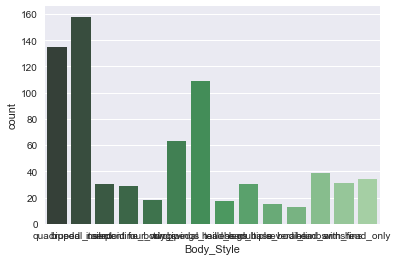

In [29]:
sns.countplot(x="Body_Style", data=pokemon, palette="Greens_d", orient="");

In [170]:
body_style_gen=pokemon.groupby('Body_Style')['Generation'].value_counts()
pd.DataFrame(body_style_gen)

Generation
Body_Style       Generation            
bipedal_tailed   1                   34
                 5                   33
                 4                   26
                 2                   25
                 3                   24
                 6                   16
bipedal_tailless 3                   27
                 5                   25
                 1                   21
                 4                   16
                 2                   14
                 6                    6
four_wings       3                    5
                 1                    4
                 4                    4
                 2                    3
                 5                    1
                 6                    1
head_arms        5                   12
                 3                    8
                 4                    8
                 6                    6
                 1                    5
head_base        1                    7
                 5                    7
                 6                    7
                 3                    4
                 4                    3
                 2                    2
head_legs        1                    7
...                                 ...
multiple_bodies  6                    3
                 3                    1
quadruped        5                   29
                 1                   25
                 4                   25
                 2                   22
                 3                   20
                 6                   14
serpentine_body  1                    9
                 3                    6
                 2                    5
                 4                    4
                 6                    4
                 5                    1
several_limbs    5                    5
                 1                    4
                 6                    2
                 2                    1
                 4                    1
two_wings        5                   15
                 2                   13
                 1                   12
                 3                    9
                 4                    8
                 6                    6
with_fins        3                   12
                 5                    7
                 1                    6
                 2                    4
                 4                    2

[80 rows x 1 columns]

# Pivot Tables
## How does Body-Style affect BMI?

In [33]:
pokemon.groupby('Body_Style').agg({'BMI': [np.size, np.mean]})

BMI           
                   size       mean
Body_Style                        
bipedal_tailed    158.0  33.831818
bipedal_tailless  109.0  40.740580
four_wings         18.0  21.653086
head_arms          39.0  38.429536
head_base          30.0  40.402824
head_legs          17.0  40.619559
head_only          34.0  55.994744
insectoid          30.0  48.825940
multiple_bodies    15.0  94.825348
quadruped         135.0  49.927768
serpentine_body    29.0  24.298626
several_limbs      13.0  49.484653
two_wings          63.0  23.264795
with_fins          31.0  28.225770

## How does Type affect BMI??

In [34]:
pokemon.groupby('Type_1').agg({'BMI': [np.size, np.mean]})

BMI            
           size        mean
Type_1                     
Bug        63.0   39.697991
Dark       28.0   30.479200
Dragon     24.0   34.950204
Electric   36.0   35.260337
Fairy      17.0   18.827845
Fighting   25.0   37.006407
Fire       47.0   44.263017
Flying      3.0   32.178393
Ghost      23.0   21.510496
Grass      66.0   32.033566
Ground     30.0   54.059268
Ice        23.0   53.293364
Normal     93.0   35.912251
Poison     28.0   31.242569
Psychic    47.0   27.153463
Rock       41.0   71.895216
Steel      22.0  110.829417
Water     105.0   34.087327

## Which Generation had the highest average BMI???

In [175]:
pokemon.groupby('Generation').agg({'BMI': [np.size, np.mean]})

BMI           
             size       mean
Generation                  
1           151.0  32.717245
2           100.0  33.350521
3           135.0  49.283744
4           107.0  44.942510
5           156.0  42.269388
6            72.0  34.244590

In [210]:
pokemon_BMI_Type1=pokemon.groupby('Type_1').agg({'BMI': [np.size, np.mean]})
pokemon_BMI_Type1.columns

MultiIndex(levels=[[u'BMI'], [u'size', u'mean']],
           labels=[[0, 0], [0, 1]])

### Body-Type Counts for all Generations
#### Head-Only Pokemon?? Creepy

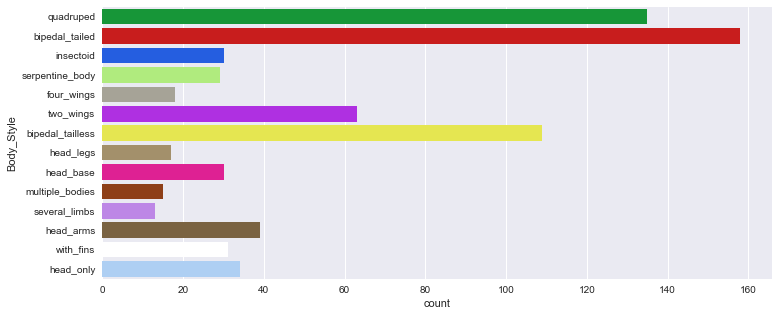

In [169]:
f, ax = plt.subplots(figsize=(12, 5))
sns.countplot(y="Body_Style", data=pokemon, order=['quadruped', 'bipedal_tailed', 'insectoid', 'serpentine_body',
       'four_wings', 'two_wings', 'bipedal_tailless', 'head_legs',
       'head_base', 'multiple_bodies', 'several_limbs', 'head_arms',
       'with_fins', 'head_only'], palette=sns.xkcd_palette(colors));

In [24]:
pokemon.loc[(pokemon['species'] =='Ogre Darner')]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,species,Pr_Female
468,469,Yanmega,Bug,Flying,515,86,76,86,116,56,...,0.5,Bug,None,False,1.91,51.5,30,four_wings,Ogre Darner,0.5


#### All Dragon Types

In [6]:
pokemon.loc[(pokemon['species'] =='Dragon')]

,Unnamed: 0,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,...,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,species,Pr_Female,BMI,region
115,115,116,Horsea,Water,None,295,30,40,70,70,...,Dragon,False,0.41,8.0,225,head_base,Dragon,0.5,47.590720,Kanto
116,116,117,Seadra,Water,None,440,55,65,95,95,...,Dragon,False,1.19,25.0,75,head_base,Dragon,0.5,17.654120,Kanto
146,146,147,Dratini,Dragon,None,300,41,64,45,50,...,Dragon,False,1.80,3.3,45,serpentine_body,Dragon,0.5,1.018519,Kanto
147,147,148,Dragonair,Dragon,None,420,61,84,65,70,...,Dragon,False,3.99,16.5,45,serpentine_body,Dragon,0.5,1.036426,Kanto
148,148,149,Dragonite,Dragon,Flying,600,91,134,95,100,...,Dragon,False,2.21,210.0,45,bipedal_tailed,Dragon,0.5,42.996663,Kanto
229,229,230,Kingdra,Water,Dragon,540,75,95,95,95,...,Dragon,False,1.80,152.0,45,head_base,Dragon,0.5,46.913580,Johto
372,372,373,Salamence,Dragon,Flying,600,95,135,80,110,...,None,True,1.50,102.6,45,quadruped,Dragon,0.5,45.600000,Hoenn
705,705,706,Goodra,Dragon,None,600,90,100,70,110,...,None,False,2.01,150.5,45,bipedal_tailed,Dragon,0.5,37.251553,Kalos


#### 5 out of 8 of All Dragon Type Pokemon are from Generation 1

In [30]:
pokemon.loc[(pokemon['species'] =='Dragon') & (pokemon['Generation'] ==1)]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,species,Pr_Female,BMI,region
115,116,Horsea,Water,None,295,30,40,70,70,25,...,Dragon,False,0.41,8.0,225,head_base,Dragon,0.5,47.590720,Kanto
116,117,Seadra,Water,None,440,55,65,95,95,45,...,Dragon,False,1.19,25.0,75,head_base,Dragon,0.5,17.654120,Kanto
146,147,Dratini,Dragon,None,300,41,64,45,50,50,...,Dragon,False,1.80,3.3,45,serpentine_body,Dragon,0.5,1.018519,Kanto
147,148,Dragonair,Dragon,None,420,61,84,65,70,70,...,Dragon,False,3.99,16.5,45,serpentine_body,Dragon,0.5,1.036426,Kanto
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,...,Dragon,False,2.21,210.0,45,bipedal_tailed,Dragon,0.5,42.996663,Kanto


### Which Region/Gen has the most pokemon?

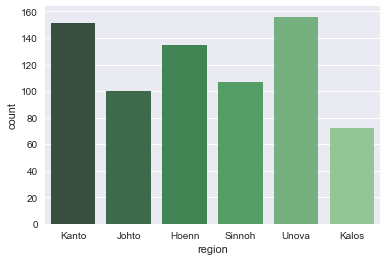

In [26]:
sns.countplot(x="region", data=pokemon, palette="Greens_d");

In [5]:
# 18 Pokemon Type 1 categories
pokemon['Type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

# Creating a Custom Palette that links Associates Color to Type.

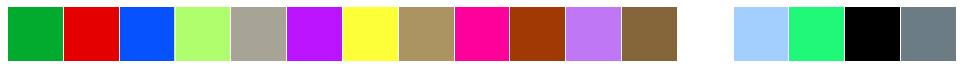

In [185]:
colors = ["kelly green", "red", "electric blue", "light lime", "greyish", "neon purple", "lemon yellow", "dark beige", "neon pink", "russet", "light purple", "dirt brown", "white", "baby blue", "spearmint", "black", "battleship grey"]
sns.palplot(sns.xkcd_palette(colors))

# The following graph show the distributions of Type 1's across 6 Generations of Pokemon

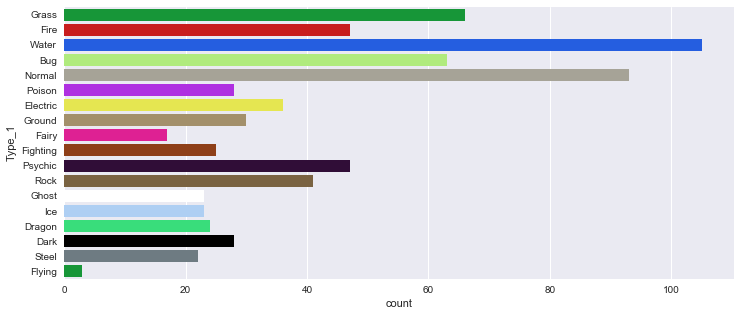

In [184]:
f, ax = plt.subplots(figsize=(12, 5))
sns.countplot(y="Type_1", data=pokemon,order=['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], palette=sns.xkcd_palette(colors));

### Distribution of Type 2 across all Generations
Flying is a common Type 2 to have. I assume there are lots of Bird-variant pokemon

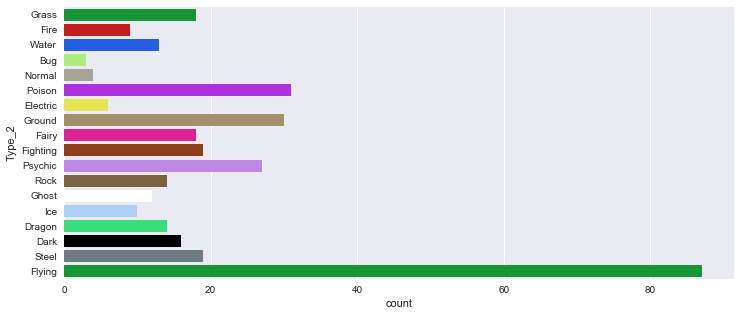

In [102]:
f, ax = plt.subplots(figsize=(12, 5))
sns.countplot(y="Type_2", data=pokemon,order=['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], palette=sns.xkcd_palette(colors));

#### Generation 1 has a lot of Water and Normal types. 

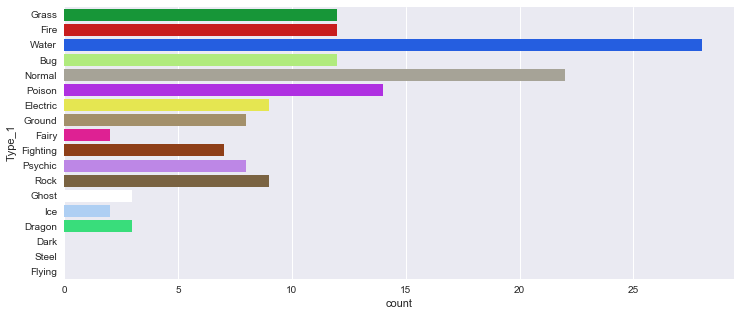

In [96]:
f, ax = plt.subplots(figsize=(12, 5))
sns.countplot(y="Type_1", data=gen1, order=['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], palette=sns.xkcd_palette(colors));

# Generation 2 has no Dragon Type1's

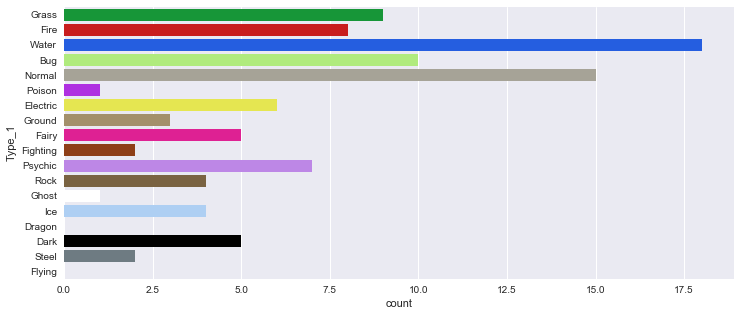

In [103]:
f, ax = plt.subplots(figsize=(12, 5))
sns.countplot(y="Type_1", data=gen2, order=['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], palette=sns.xkcd_palette(colors));

#### Again, I ask, which Generation/Region had the most Pokemon?

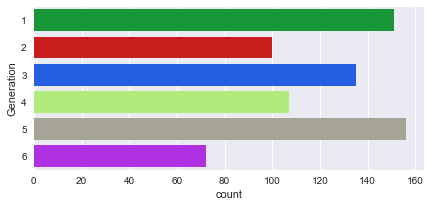

In [100]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Generation", data=pokemon, palette=sns.xkcd_palette(colors));

### Generation 4 has the widest Distribution of Attack Points

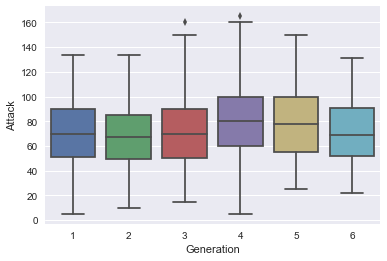

In [35]:
sns.boxplot(x=pokemon.Generation, y=pokemon.Attack);

In [188]:
pokemon.columns

Index([u'Number', u'Name', u'Type_1', u'Type_2', u'Total', u'HP', u'Attack',
       u'Defense', u'Sp_Atk', u'Sp_Def', u'Speed', u'Generation',
       u'isLegendary', u'Color', u'hasGender', u'Pr_Male', u'Egg_Group_1',
       u'Egg_Group_2', u'hasMegaEvolution', u'Height_m', u'Weight_kg',
       u'Catch_Rate', u'Body_Style', u'species', u'Pr_Female', u'region',
       u'BMI'],
      dtype='object')

In [36]:
stats = ['Total', 'HP', 'Attack','Defense','Sp_Atk', 'Generation', 'Sp_Def', 'Speed', 'Height_m', 'Weight_kg', 'Catch_Rate','BMI']

In [37]:
pokemon[stats]

,Total,HP,Attack,Defense,Sp_Atk,Generation,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate,BMI
0,318,45,49,49,65,1,65,45,0.71,6.9,45,13.687760
1,405,60,62,63,80,1,80,60,0.99,13.0,45,13.263953
2,525,80,82,83,100,1,100,80,2.01,100.0,45,24.751863
3,309,39,52,43,60,1,50,65,0.61,8.5,45,22.843322
4,405,58,64,58,80,1,65,80,1.09,19.0,45,15.991920
5,534,78,84,78,109,1,85,100,1.70,90.5,45,31.314879
6,314,44,48,65,50,1,64,43,0.51,9.0,45,34.602076
7,405,59,63,80,65,1,80,58,0.99,22.5,45,22.956841
8,530,79,83,100,85,1,105,78,1.60,85.5,45,33.398437
9,195,45,30,35,20,1,20,45,0.30,2.9,255,32.222222


### Gigantic Pairplot, Colors represent Generation

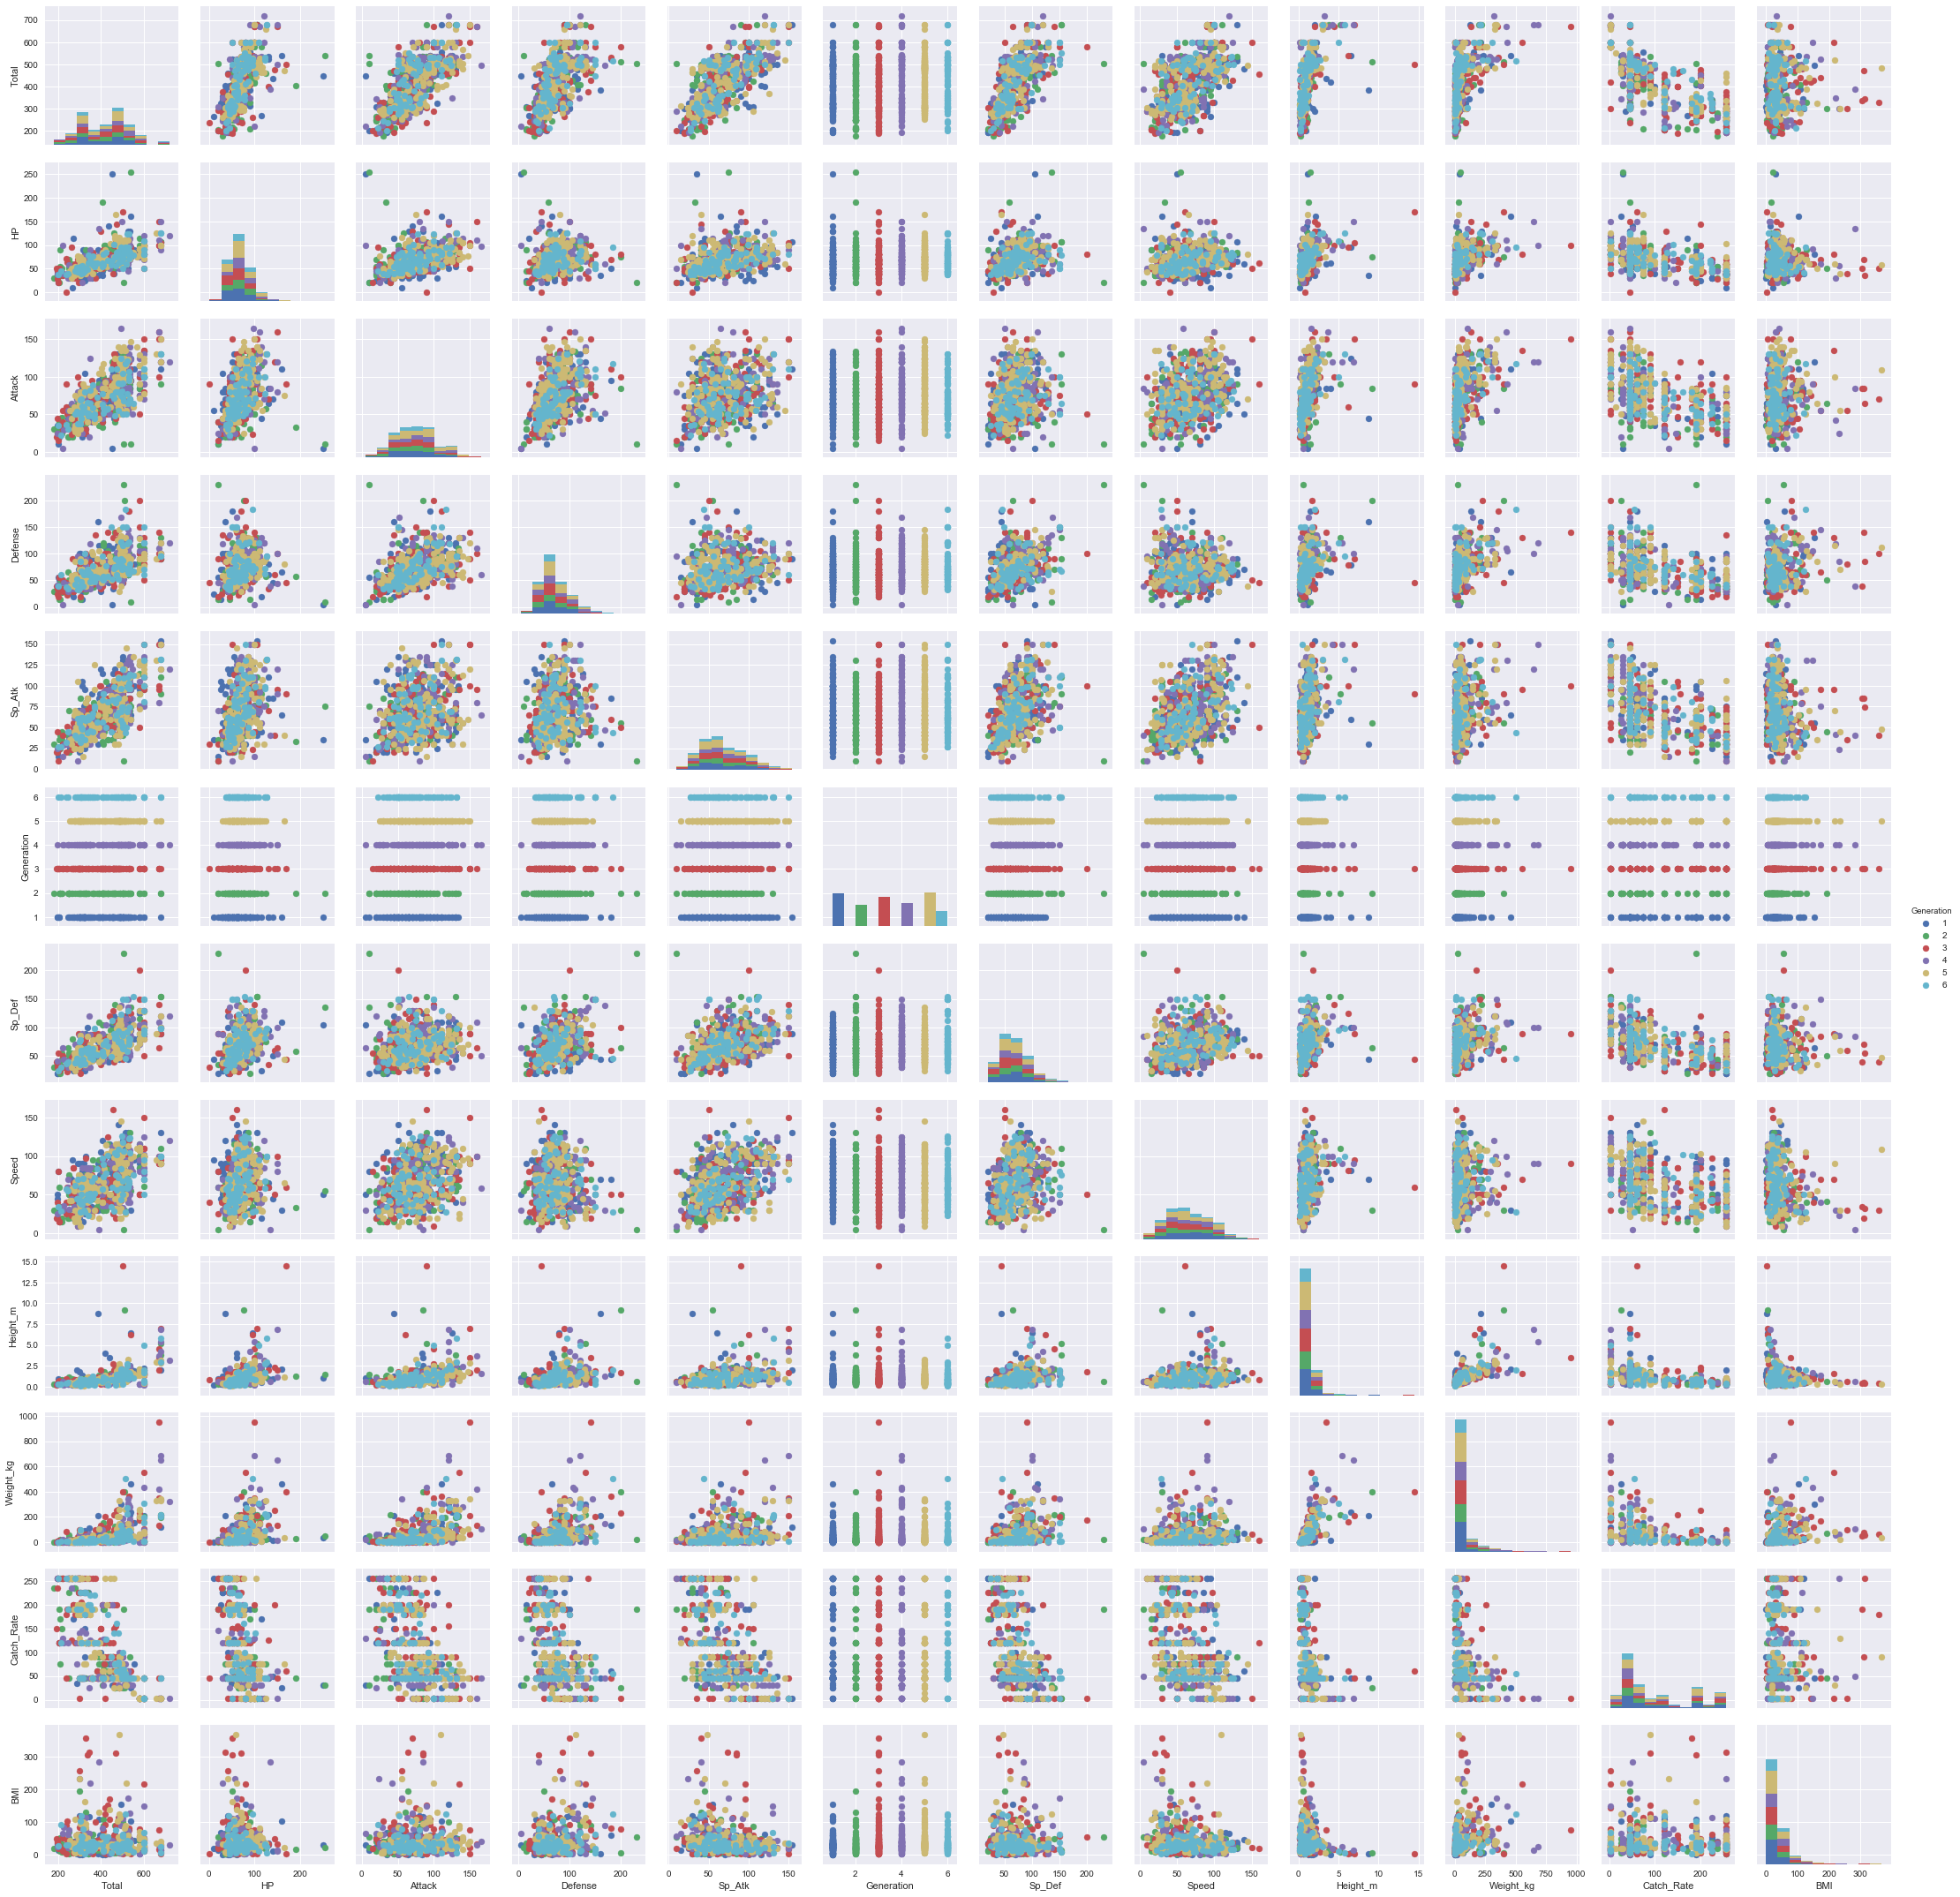

In [205]:
g = sns.PairGrid(pokemon[stats], hue="Generation")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [208]:
gen1

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,species,Pr_Female,region,BMI
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Grass,False,0.71,6.9,45,quadruped,Seed,0.125,Kanto,13.687760
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Grass,False,0.99,13.0,45,quadruped,Seed,0.125,Kanto,13.263953
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Grass,True,2.01,100.0,45,quadruped,Seed,0.125,Kanto,24.751863
3,4,Charmander,Fire,None,309,39,52,43,60,50,...,Dragon,False,0.61,8.5,45,bipedal_tailed,Lizard,0.125,Kanto,22.843322
4,5,Charmeleon,Fire,None,405,58,64,58,80,65,...,Dragon,False,1.09,19.0,45,bipedal_tailed,Flame,0.125,Kanto,15.991920
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,Dragon,True,1.70,90.5,45,bipedal_tailed,Flame,0.125,Kanto,31.314879
6,7,Squirtle,Water,None,314,44,48,65,50,64,...,Water_1,False,0.51,9.0,45,bipedal_tailed,Tiny Turtle,0.125,Kanto,34.602076
7,8,Wartortle,Water,None,405,59,63,80,65,80,...,Water_1,False,0.99,22.5,45,bipedal_tailed,Turtle,0.125,Kanto,22.956841
8,9,Blastoise,Water,None,530,79,83,100,85,105,...,Water_1,True,1.60,85.5,45,bipedal_tailed,Shellfish,0.125,Kanto,33.398437
9,10,Caterpie,Bug,None,195,45,30,35,20,20,...,None,False,0.30,2.9,255,insectoid,Worm,0.500,Kanto,32.222222


#### Generation 1 Pairplot

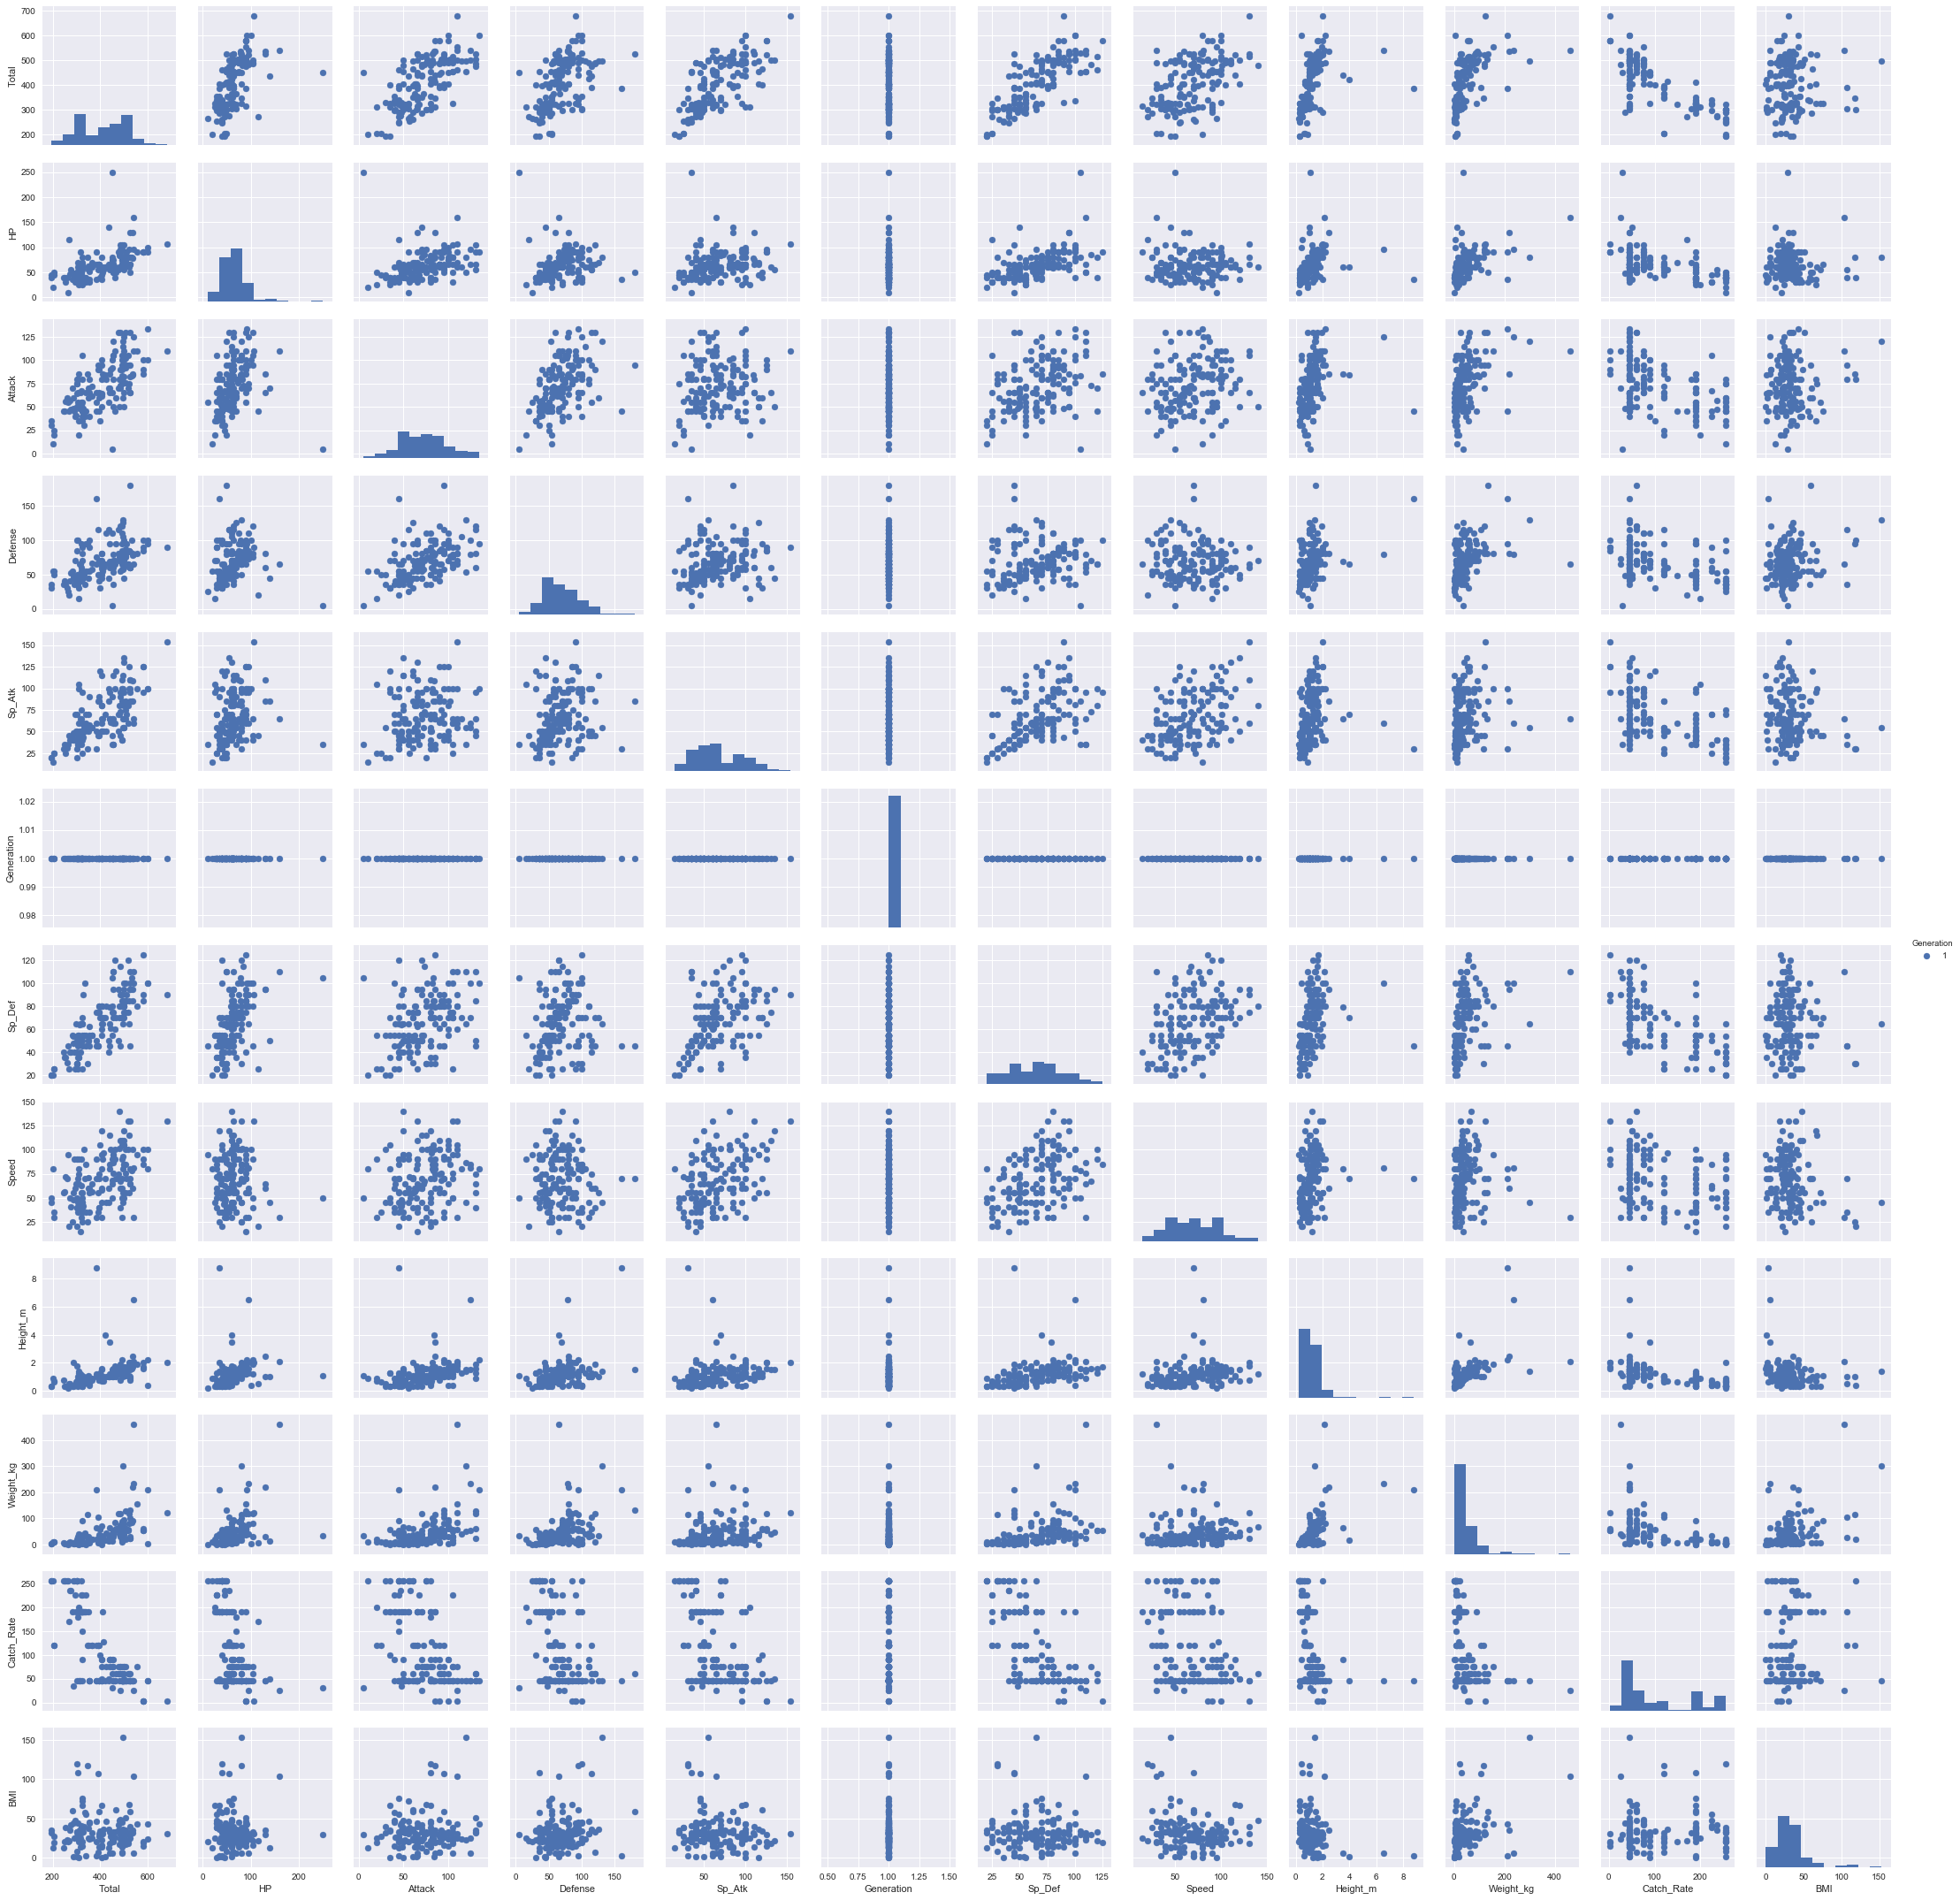

In [209]:
g = sns.PairGrid(gen1[stats], hue="Generation")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [57]:
[pokemon['Attack'].sort_values(ascending=False)]

[408    165
 288    160
 485    160
 382    150
 385    150
 643    150
 383    150
 611    147
 554    140
 533    140
 463    140
 566    140
 375    135
 588    135
 529    135
 372    135
 525    135
 247    134
 148    134
 716    131
 715    131
 472    130
 444    130
 111    130
 285    130
 135    130
 216    130
 98     130
 645    130
 358    130
       ... 
 162     30
 237     30
 369     30
 262     30
 411     29
 545     27
 172     25
 438     25
 13      25
 279     25
 324     25
 400     25
 516     25
 435     24
 359     23
 664     22
 234     20
 164     20
 62      20
 182     20
 457     20
 10      20
 297     20
 174     20
 348     15
 212     10
 241     10
 128     10
 112      5
 439      5
 Name: Attack, dtype: int64]

### Something Happening with Health Point distribution as the Generations continue

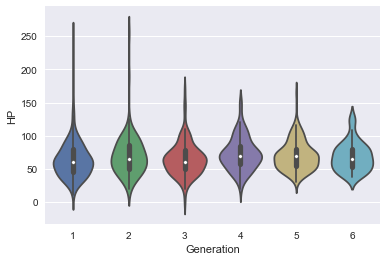

In [59]:
sns.violinplot(x=pokemon.Generation, y=pokemon.HP);

In [60]:
pokemon.loc[pokemon['Generation'] ==4]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,species,Pr_Female,region
386,387,Turtwig,Grass,None,318,55,68,64,45,55,...,Monster,Grass,False,0.41,10.2,45,quadruped,Tiny Leaf,0.125,Sinnoh
387,388,Grotle,Grass,None,405,75,89,85,55,65,...,Monster,Grass,False,1.09,97.0,45,quadruped,Grove,0.125,Sinnoh
388,389,Torterra,Grass,Ground,525,95,109,105,75,85,...,Monster,Grass,False,2.21,310.0,45,quadruped,Continent,0.125,Sinnoh
389,390,Chimchar,Fire,None,309,44,58,44,58,44,...,Field,Human-Like,False,0.51,6.2,45,bipedal_tailed,Chimp,0.125,Sinnoh
390,391,Monferno,Fire,Fighting,405,64,78,52,78,52,...,Field,Human-Like,False,0.89,22.0,45,bipedal_tailed,Playful,0.125,Sinnoh
391,392,Infernape,Fire,Fighting,534,76,104,71,104,71,...,Field,Human-Like,False,1.19,55.0,45,bipedal_tailed,Flame,0.125,Sinnoh
392,393,Piplup,Water,None,314,53,51,53,61,56,...,Water_1,Field,False,0.41,5.2,45,bipedal_tailless,Penguin,0.125,Sinnoh
393,394,Prinplup,Water,None,405,64,66,68,81,76,...,Water_1,Field,False,0.79,23.0,45,bipedal_tailed,Penguin,0.125,Sinnoh
394,395,Empoleon,Water,Steel,530,84,86,88,111,101,...,Water_1,Field,False,1.70,84.5,45,bipedal_tailed,Emperor,0.125,Sinnoh
395,396,Starly,Normal,Flying,245,40,55,30,30,30,...,Flying,None,False,0.30,2.0,255,two_wings,Starling,0.500,Sinnoh


### Attack follows a fairly normal distribution

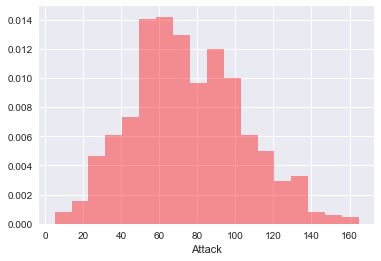

In [104]:
sns.distplot(pokemon.Attack, kde=False,norm_hist=True, color="r")

# Health has a skew to is distribution with outliers

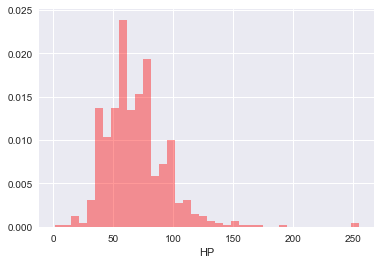

In [105]:
sns.distplot(pokemon.HP, kde=False,norm_hist=True, color="r")

## BMI is skewed severely, I think a lot of Pokemon hay have Health Risks

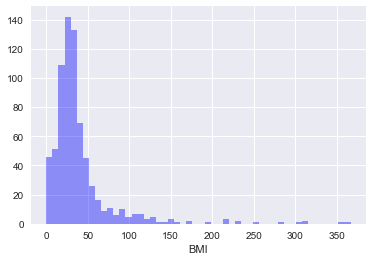

In [26]:
sns.distplot(pokemon.BMI, kde=False, color='b')

In [106]:
underweight_pokemon = pokemon.loc[(pokemon['BMI']<18.5)]                               # Underweight 149  20.67%

In [66]:
healthyweight_pokemon = pokemon.loc[(pokemon['BMI']>=18.5) &(pokemon['BMI']<=24.9)]    # Healthy    118     16.37%

In [67]:
overweight_pokemon = pokemon.loc[(pokemon['BMI']>=25) &(pokemon['BMI']<=29.9)]     # Overweight  90     12.48%

In [68]:
obese_pokemon = pokemon.loc[(pokemon['BMI']>30)]                              # Obese      358     49.65%

### Distribution Plot for only Obese Pokemon with BMI >30
#### Looks a lot like the distplot for all Pokemon because about 50% of all Pokemon are Obese

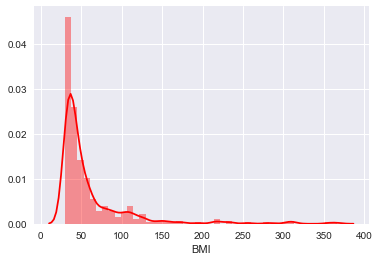

In [70]:
sns.distplot(obese_pokemon.BMI, color='r')

#### Only 16.37% of Pokemon are Healthy. 
##### distribution is slightly skewed to the right, because most pokemon are overweight

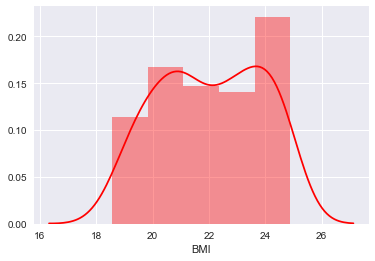

In [74]:
sns.distplot(healthyweight_pokemon.BMI, color='r')

### 20.67% of Pokemon are Underweight

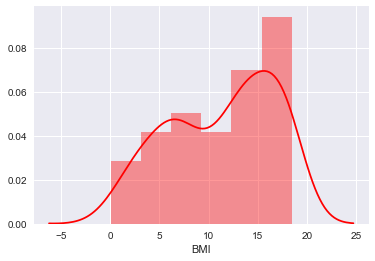

In [76]:
sns.distplot(underweight_pokemon.BMI, color='r')

### 12.48% of Pokemon have a BMI between 25 and 29.9 (Overweight)

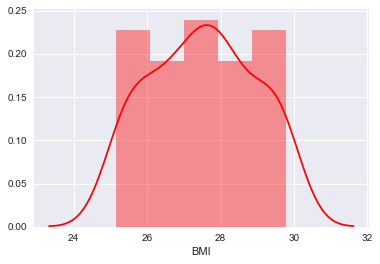

In [77]:
sns.distplot(overweight_pokemon.BMI, color='r')

In [48]:
float(358)/721

0.49653259361997226

In [50]:
float(90)/721

0.12482662968099861

In [52]:
float(118)/721

0.1636615811373093

In [57]:
float(149)/721

0.20665742024965325

### Now, Lets see analyze BMI between Generations
#### Which Generation has the highest percentage of Healthyweight Pokemon???

### Generation 1 BMI

In [35]:
gen1_healthy = gen1.loc[(pokemon['BMI']>=18.5) &(gen1['BMI']<=24.9)]    # Healthy    118     16.37%
len(gen1_healthy)/len(gen1)*100

19.205298013245034

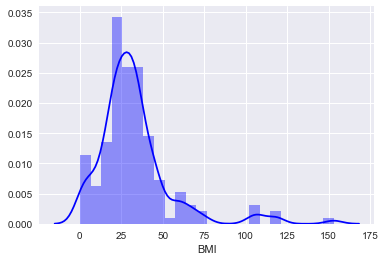

In [89]:
sns.distplot(gen1.BMI, color='b')

### Generation 2 BMI

In [34]:
gen2_healthy = gen2.loc[(gen2['BMI']>=18.5) &(gen2['BMI']<=24.9)]    # Healthy    118     16.37%
len(gen2_healthy)/len(gen2)*100

17.0

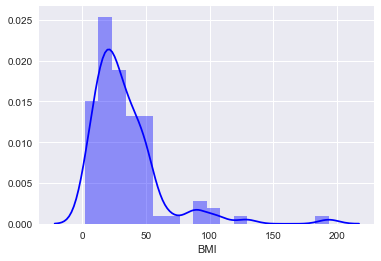

In [90]:
sns.distplot(gen2.BMI, color='b')

### Generation 3 BMI

In [33]:
gen3_healthy = gen3.loc[(gen3['BMI']>=18.5) &(gen3['BMI']<=24.9)]    # Healthy    118     16.37%
len(gen3_healthy)/len(gen3)*100

18.51851851851852

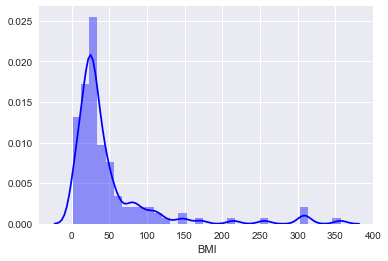

In [91]:
sns.distplot(gen3.BMI, color='b')

### Generation 4 BMI

In [32]:
gen4_healthy = gen4.loc[(gen4['BMI']>=18.5) &(gen4['BMI']<=24.9)]    # Healthy    118     16.37%
len(gen4_healthy)/len(gen4)*100

12.149532710280374

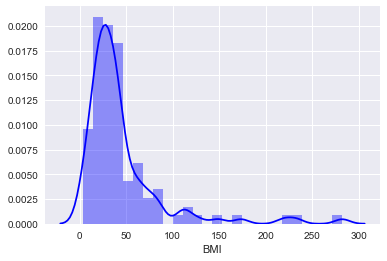

In [92]:
sns.distplot(gen4.BMI, color='b')

### Generation 5 BMI

In [30]:
gen5_healthy = gen5.loc[(gen5['BMI']>=18.5) &(gen5['BMI']<=24.9)]    # Healthy    118     16.37%
len(gen5_healthy)/len(gen5)*100

12.82051282051282

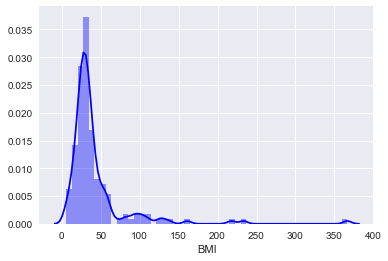

In [93]:
sns.distplot(gen5.BMI, color='b')

### Generation 6 BMI

In [31]:
gen6_healthy = gen6.loc[(gen6['BMI']>=18.5) &(gen6['BMI']<=24.9)]    # Healthy    118     16.37%
len(gen6_healthy)/len(gen6)*100

19.444444444444446

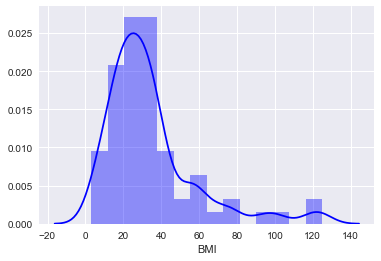

In [94]:
sns.distplot(gen6.BMI, color='b')